In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn

def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)

def rgba(color, alpha):
    return mpl.colors.to_rgba(color, alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [9]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':14, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':14, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.axisLabelArgs('both', {'fontsize':14})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            [r'Red $\times$ HI'+'\nCross-Power', r'Blue $\times$ HI'+'\nCross-Power',
            r'All $\times$ HI' + '\nCross-Power', r'Color Ratio'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ds.plotArgs('fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('fieldname', 'hisubhalo', {'color':'sandybrown'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


# HI Auto Power one halo term

In [15]:
%%capture
ip = {'is_auto':True, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':[99,67], 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':'no key found',
     'path':'fiducial'}
ip['fieldname'] = ['vn', 'hiptl', 'hisubhalo']
ip['space'] = ['real', 'redshift']
fg = ds.figrid('fieldname', 'space', 'snapshot', ip)


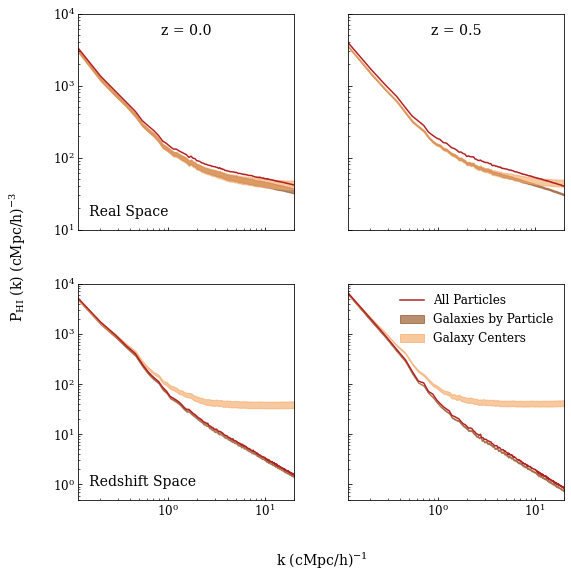

In [16]:
fg.autoFill({'alpha':0.6})
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%r'\mathrm{HI}')
fg.legendArgs({}, (1,1))
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-1, 1e4)}, ['redshift'])
fg.axisArgs({'ylim':(1e1, 1e4)}, ['real'])
fg.plot()
fg.save('HI-auto_snapshot_space.png')
fg.fig

# compare hisubhalo, hiptl-vn X-powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


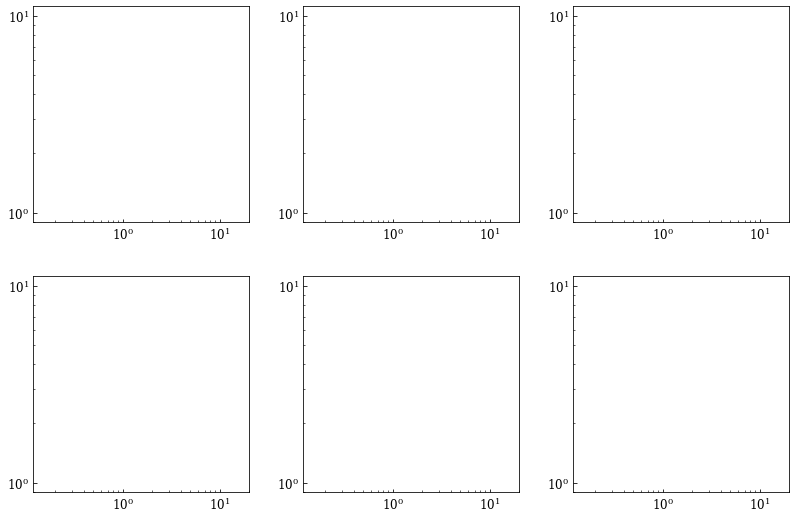

In [23]:
ip = {'is_auto':False, 'gal_res':'diemer',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'HI_fieldname':['vn','hiptl', 'hisubhalo'],
      'snapshot':99, 'sim_resolution':'high',
      'censat':'no key found', 'mas':'CICW', 'post_process':'no key found',
     'path':'fiducial'}
ip['space'] = ['real', 'redshift']
ip['color'] = ['blue', 'red', 'resolved']
ip['color_cut'] = ['0.60', 'None']
fg = ds.figrid('HI_fieldname', 'space', 'color', ip)


No handles with labels found to put in legend.


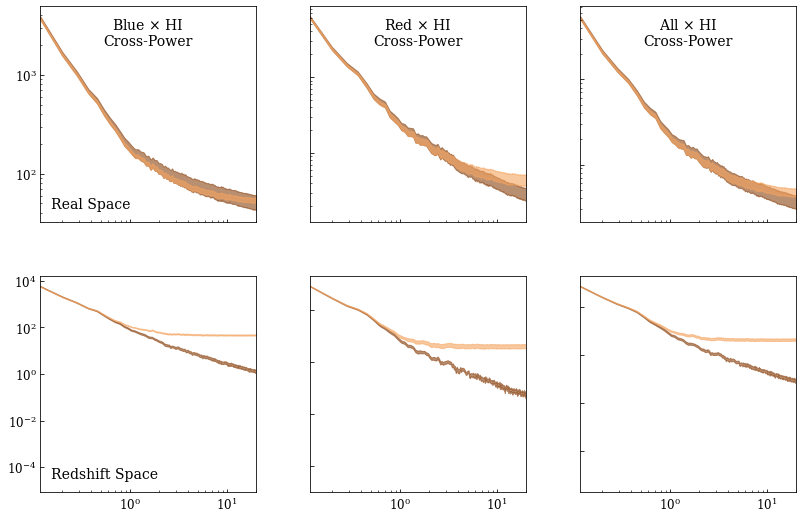

In [24]:
fg.setDefaultTicksParams()
fg.fill({'HI_fieldname':['vn', 'hiptl']}, {'alpha':0.6, 'color':'saddlebrown'})
fg.fill({'HI_fieldname':'hisubhalo'}, {'alpha':0.6, 'color':'sandybrown'})
fg.plot()
fg.fig